<a href="https://colab.research.google.com/github/cameron-925/Math-470-Final-Project/blob/main/HeartRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data from the provided file
data = pd.read_csv('/content/processedcleveland.csv')

# Separate the predictor variables (X) and the target variable (y)
X = data.iloc[:, :-1]  # Select all columns except the last one
y = data.iloc[:, -1]   # Select the last column



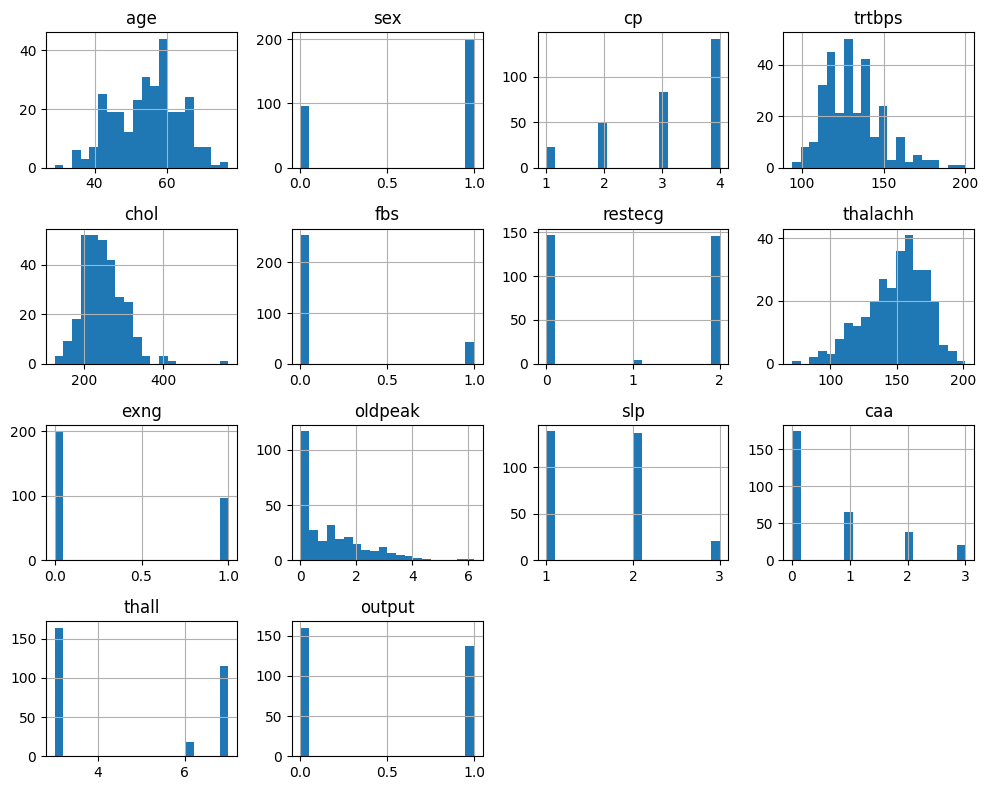

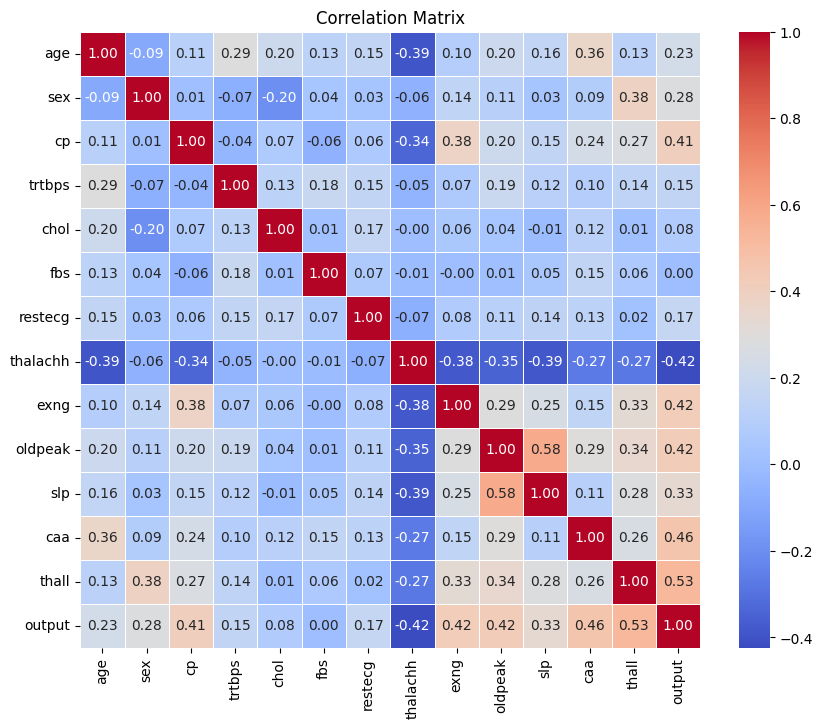

In [28]:
# Plot distributions of all columns
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Plot Correlation Matrix
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [30]:

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=142,
                                       max_depth=7, min_samples_split=2, min_samples_leaf=2,
                                       max_features='sqrt',bootstrap=True )

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = rf_classifier.predict(X_train)

# Calculate the out-of-bag mean error
oob_error = 1 - rf_classifier.oob_score_

# Make predictions on the testing set
y_test_pred = rf_classifier.predict(X_test)

# Calculate the out-of-bag mean squared error
oob_mse = mean_squared_error(y_train, y_train_pred)

# Calculate the out-of-bag classification error
oob_classification_error = 1 - accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Get the feature importance from the trained model
feature_importance = rf_classifier.feature_importances_


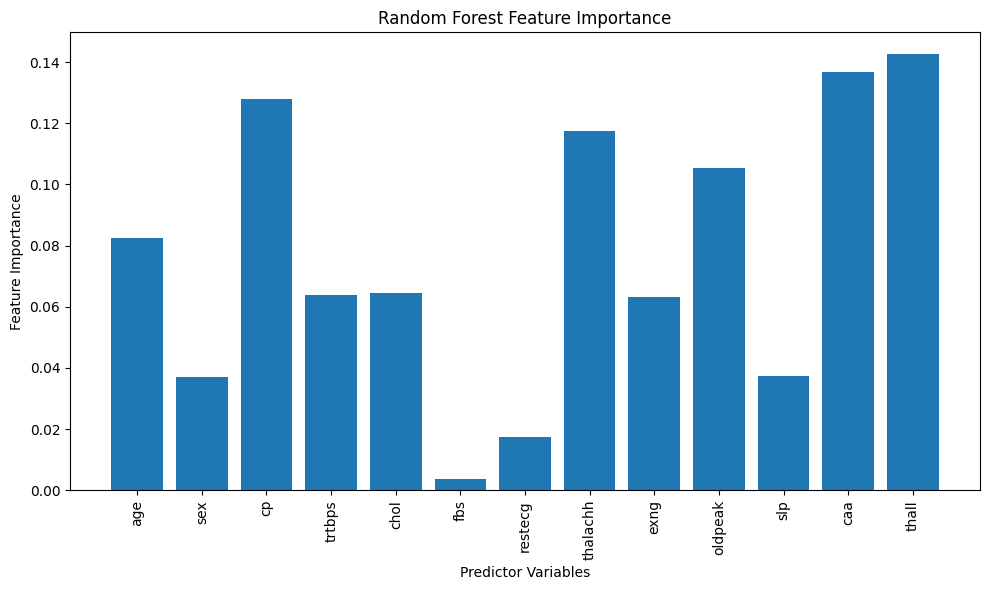

Out-of-Bag Mean Error: 0.18565400843881852
Out-of-Bag Mean Squared Error: 0.029535864978902954
Out-of-Bag Classification Error: 0.029535864978902926
Training Accuracy: 0.9704641350210971
Testing Accuracy: 0.9


In [31]:

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=X.columns)
plt.xticks(rotation=90)
plt.xlabel('Predictor Variables')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Print the calculated metrics
print("Out-of-Bag Mean Error:", oob_error)
print("Out-of-Bag Mean Squared Error:", oob_mse)
print("Out-of-Bag Classification Error:", oob_classification_error)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


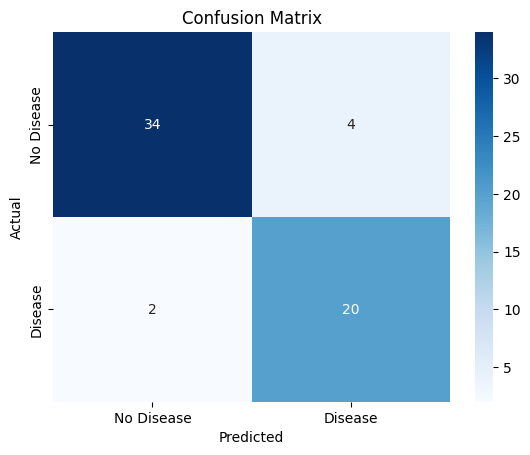

In [32]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# Assume y_test and y_pred are defined
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.83
Recall: 0.91
F1 Score: 0.87
